In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn import metrics
# from sklearn.linear_model import LogisticRegression

In [59]:
db = pd.read_csv("weatherAUS.csv")
data = db.copy()
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [60]:

data = db.copy()
data = data[data['RainToday'].notna()]
data = data.replace(['No', 'Yes', None], [0,1,-1]) # coloquei isso e funcionou
y = data.RainToday
X = db.drop(columns=['RainToday'])  


X.shape, y.shape

((145460, 22), (142199,))

In [61]:
# o Y é o charge, para cada charge, ou seja para cada linha eu ploto o valor do charge e a coluna que estou visitando
# primeiro exemplo é para o valor X de charge qual é a idade correspondente (idade,charge)
# for i in range(X.shape[1]):
#     plt.xlabel(f"{i}: {X.columns[i]}")
#     plt.ylabel("Classificação")
#     plt.scatter(X.iloc[:,i], y)
#     plt.show()

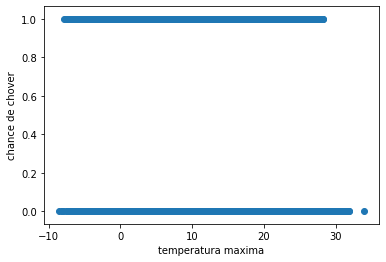

((142199, 1), (142199,))

In [68]:
X = data.iloc[:,2].values.reshape(-1,1)
#porque precisa ser uma matriz mesmo?

# X4 = X.iloc[:,1:2]
# plt.scatter(X4,y)
# plt.show()

# X = np.array(X, dtype=float)
# y = np.array(y, dtype=float)

# plt.figure(figsize=(10,10),dpi=80)
plt.xlabel("temperatura maxima")
plt.ylabel("chance de chover")
plt.scatter(X, y)
plt.show()

X.shape, y.shape



C:\Users\luizg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


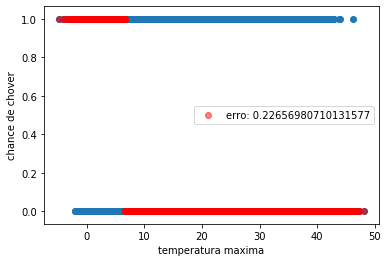

Coefficients: 
 [[-0.08047986]]
Mean squared error: 0.23
intercept_: [0.53262132]
acuracia: 0.7734301928986842


In [66]:
plt.xlabel("temperatura maxima")
plt.ylabel("chance de chover")
plt.scatter(X, y)
modelo = linear_model.LogisticRegression()
modelo.fit(X,y)
y_pred = modelo.predict(X)
erro = metrics.mean_squared_error(y, y_pred)
plt.plot(X, y_pred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()


print("Coefficients: \n", modelo.coef_)
print("Mean squared error: %.2f" % metrics.mean_squared_error(y, y_pred))
print("intercept_:",modelo.intercept_)
print("acuracia:",metrics.accuracy_score(y,y_pred))


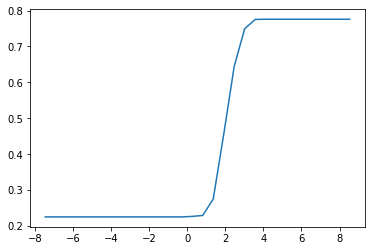

In [64]:
delta = 8
intercept = modelo.intercept_

variancia_intercept = np.linspace(intercept-delta, intercept+delta, 30)

# percorrer depois de X-8>x>X+8 (= intercept)
# substituindo o intercept pelo novo e calcular o RMSE apos o predict
# acumulando os rmse num array e depois plota eles

rmseArray = []
for w in variancia_intercept:
	modelo.intercept_ = w
	ypred = modelo.predict(X)
	mse = metrics.mean_squared_error(y, ypred)
	rmseArray.append(mse)

plt.plot(variancia_intercept,rmseArray)
plt.show()
